## 머신러닝
# 주성분 분석 (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data.shape # 속성이 30개임

(569, 30)

- 반드시 정규화를 적용해야 한다

In [5]:
X = cancer.data
X = (X-X.mean(axis=0))/X.std(axis=0)
X.shape

(569, 30)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.round(2)

array([[ 0.22,  0.1 ,  0.23,  0.22,  0.14,  0.24,  0.26,  0.26,  0.14,
         0.06,  0.21,  0.02,  0.21,  0.2 ,  0.01,  0.17,  0.15,  0.18,
         0.04,  0.1 ,  0.23,  0.1 ,  0.24,  0.22,  0.13,  0.21,  0.23,
         0.25,  0.12,  0.13],
       [-0.23, -0.06, -0.22, -0.23,  0.19,  0.15,  0.06, -0.03,  0.19,
         0.37, -0.11,  0.09, -0.09, -0.15,  0.2 ,  0.23,  0.2 ,  0.13,
         0.18,  0.28, -0.22, -0.05, -0.2 , -0.22,  0.17,  0.14,  0.1 ,
        -0.01,  0.14,  0.28],
       [-0.01,  0.06, -0.01,  0.03, -0.1 , -0.07,  0.  , -0.03, -0.04,
        -0.02,  0.27,  0.37,  0.27,  0.22,  0.31,  0.15,  0.18,  0.22,
         0.29,  0.21, -0.05, -0.04, -0.05, -0.01, -0.26, -0.24, -0.17,
        -0.17, -0.27, -0.23],
       [ 0.04, -0.6 ,  0.04,  0.05,  0.16,  0.03,  0.02,  0.07,  0.07,
         0.05,  0.1 , -0.36,  0.09,  0.11,  0.04, -0.03,  0.  ,  0.07,
         0.04,  0.02,  0.02, -0.63,  0.01,  0.03,  0.02, -0.09, -0.07,
         0.01, -0.04, -0.08],
       [ 0.04, -0.05,  0.04,

In [13]:
pca.components_.shape

(30, 30)

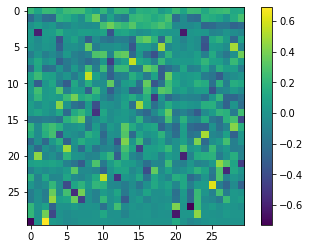

In [14]:
plt.imshow(pca.components_)
plt.colorbar()

- 새로운 축으로 데이터를 변환한다 (transform)
- 변환 이후에 앞에 있는 성분일 수록 중요함을 주목하자 (첫번째 주성분, 두번째 주성분)

In [11]:
X2 = pca.transform(X)
X2.shape

(569, 30)

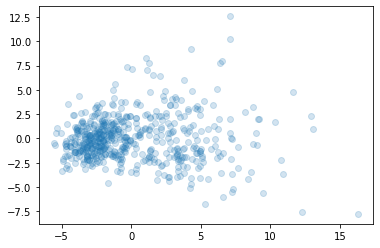

In [12]:
plt.scatter(X2[:,0], X2[:,1], alpha=0.2) # 대표 산점도라고 할 수 있다

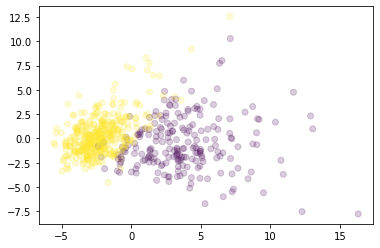

In [13]:
plt.scatter(X2[:,0], X2[:,1], c=cancer.target, alpha=0.2)

In [14]:
pca = PCA(2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_.round(2)

array([[ 0.22,  0.1 ,  0.23,  0.22,  0.14,  0.24,  0.26,  0.26,  0.14,
         0.06,  0.21,  0.02,  0.21,  0.2 ,  0.01,  0.17,  0.15,  0.18,
         0.04,  0.1 ,  0.23,  0.1 ,  0.24,  0.22,  0.13,  0.21,  0.23,
         0.25,  0.12,  0.13],
       [-0.23, -0.06, -0.22, -0.23,  0.19,  0.15,  0.06, -0.03,  0.19,
         0.37, -0.11,  0.09, -0.09, -0.15,  0.2 ,  0.23,  0.2 ,  0.13,
         0.18,  0.28, -0.22, -0.05, -0.2 , -0.22,  0.17,  0.14,  0.1 ,
        -0.01,  0.14,  0.28]])

- 주성분과 상관계수와의 관계를 알아보자

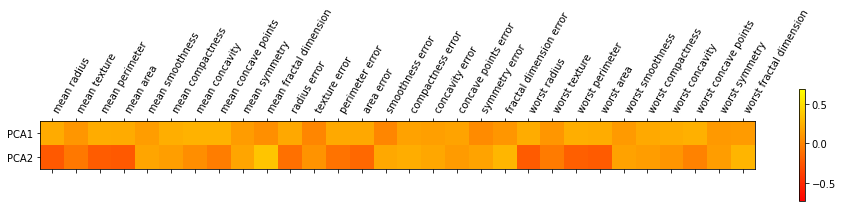

In [20]:
plt.matshow(pca.components_[:2], interpolation='none', cmap='autumn',
            vmin=pca.components_.min(), vmax=pca.components_.max())
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar()
plt.xticks(range(30), cancer.feature_names, rotation=60, ha='left')
pass

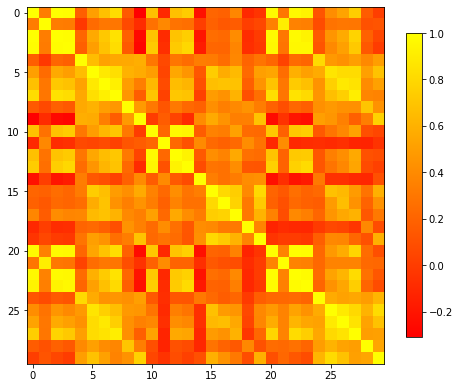

In [21]:
plt.figure(figsize=[8,8])
plt.imshow(np.corrcoef(cancer.data.T), interpolation='none', cmap='autumn')
plt.colorbar(shrink=0.7)

### MNIST 이미지
- 0~9 의 필기체 숫자 이미지

In [16]:
from sklearn.datasets import load_digits

mnist = load_digits()
display(mnist.keys(), mnist.data.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64)

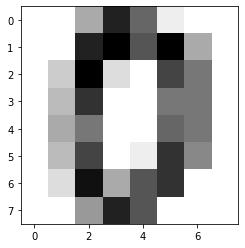

In [18]:
plt.imshow(mnist.data[0].reshape(8,8), cmap='gray_r')

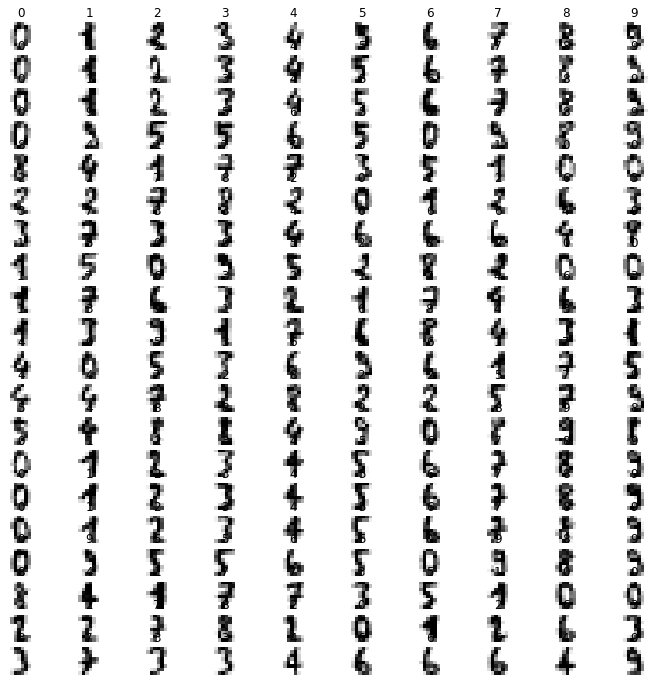

In [19]:
plt.figure(figsize=[12,12])

for i in range(200):
    plt.subplot(20,10,i+1)
    plt.imshow(mnist.data[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')
    plt.title(mnist.target[i])

In [21]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
mnist.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
pca = PCA()
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca1, pca2, pca3 = pca.components_[:3]

In [29]:
pca1.reshape(8,8).round(2)

array([[-0.  , -0.02, -0.22, -0.14, -0.03, -0.1 , -0.01,  0.  ],
       [-0.  , -0.12, -0.24,  0.15, -0.05, -0.22, -0.01,  0.  ],
       [-0.  , -0.08,  0.08,  0.22, -0.17, -0.16,  0.03,  0.  ],
       [ 0.  ,  0.06,  0.25, -0.04, -0.21, -0.04,  0.05,  0.  ],
       [-0.  ,  0.16,  0.37,  0.16,  0.09,  0.04,  0.02, -0.  ],
       [ 0.  ,  0.11,  0.3 ,  0.25,  0.21,  0.01, -0.04,  0.  ],
       [ 0.  , -0.01, -0.06,  0.09,  0.11, -0.14, -0.06,  0.  ],
       [ 0.  , -0.01, -0.24, -0.14, -0.01, -0.09, -0.04, -0.01]])

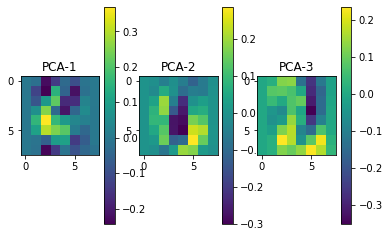

In [30]:
plt.subplot(1,3,1)
plt.imshow(pca1.reshape(8,8))
plt.title('PCA-1')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(pca2.reshape(8,8))
plt.title('PCA-2')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(pca3.reshape(8,8))
plt.title('PCA-3')
plt.colorbar()

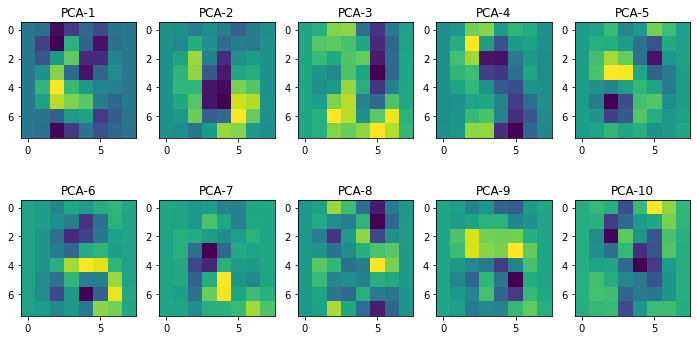

In [34]:
plt.figure(figsize=[12,6])

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(pca.components_[i].reshape(8,8))
    plt.title('PCA-'+str(i+1))

- PCA를 활용한 이미지 복원

In [36]:
X_pca = pca.transform(mnist.data)
X_pca.shape

(1797, 64)

In [37]:
recovered = np.matmul(X_pca[:,:2], pca.components_[:2])

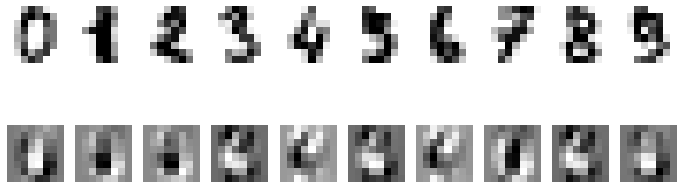

In [38]:
plt.figure(figsize=[12,4])
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,10+i+1)
    plt.imshow(recovered[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')

In [39]:
pca = PCA(2)
pca.fit(mnist.data)

X_pca2 = pca.transform(mnist.data)
X_pca2.shape

(1797, 2)

In [35]:
X_pca = pca.transform(mnist.data)
X_pca.shape

(1797, 64)

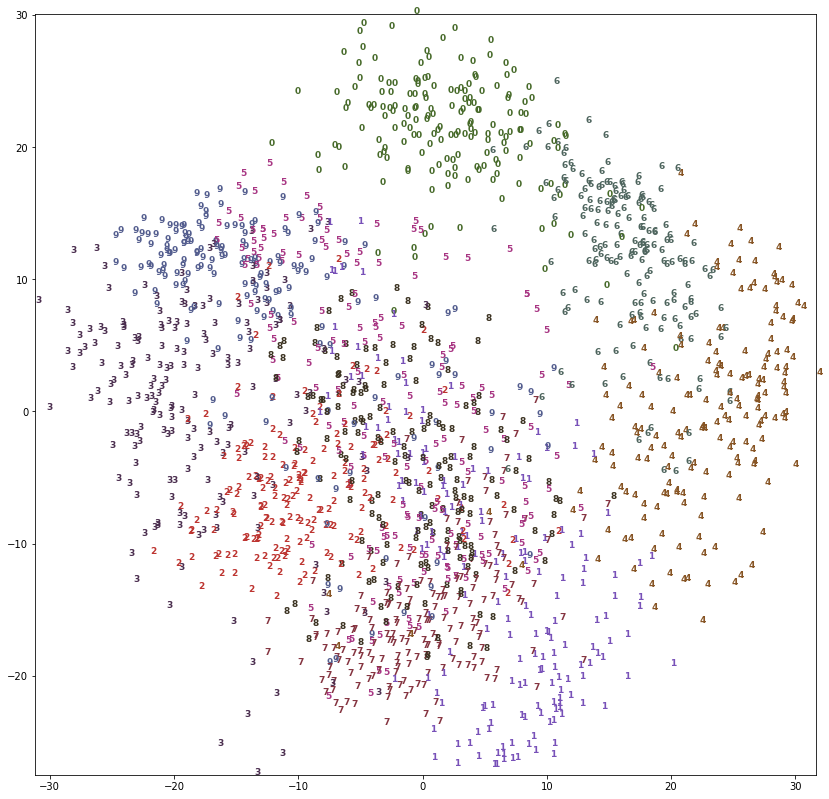

In [37]:
xmax, ymax = X_pca[:,:2].max(axis=0)
xmin, ymin = X_pca[:,:2].min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(len(X_pca)):
    plt.text(X_pca[i,0], X_pca[i,1], str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})

### 매니폴드 기법을 활용한 데이터 시각화
- t-SNE 기법 : 가까운 점은 더 가깝게, 먼 점은 더욱더 멀게 배치하는 기술

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE()

mnist_tsne = tsne.fit_transform(mnist.data)

In [41]:
mnist_tsne.shape

(1797, 2)

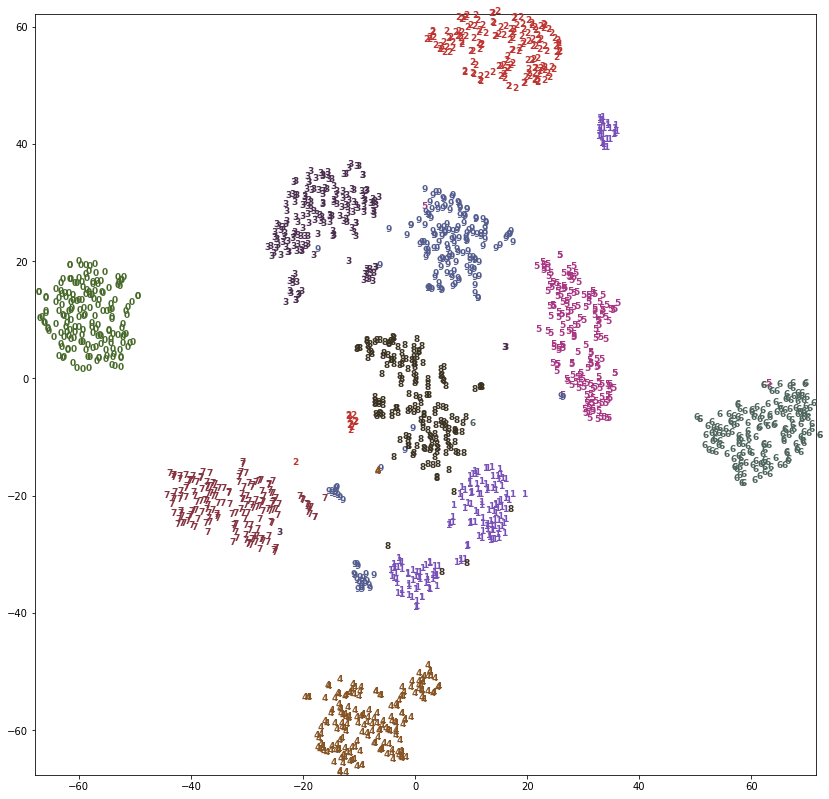

In [42]:
xmax, ymax = mnist_tsne.max(axis=0)
xmin, ymin = mnist_tsne.min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(mnist.data.shape[0]):
    plt.text(mnist_tsne[i,0], mnist_tsne[i,1],str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})